## Unziping  the dataset file

In [1]:
!unzip newzray.zip

Archive:  newzray.zip
   creating: valid/
   creating: valid/NORMAL/
  inflating: valid/NORMAL/NORMAL_1.jpeg  
  inflating: valid/NORMAL/NORMAL_2.jpeg  
  inflating: valid/NORMAL/NORMAL_3.jpeg  
  inflating: valid/NORMAL/NORMAL_4.jpeg  
   creating: valid/PNEUMONIA/
  inflating: valid/PNEUMONIA/person2_bacteria_4.jpeg  
  inflating: valid/PNEUMONIA/PNEUMONIA_1.jpeg  
  inflating: valid/PNEUMONIA/PNEUMONIA_2.jpeg  
  inflating: valid/PNEUMONIA/PNEUMONIA_3.jpeg  
  inflating: valid/PNEUMONIA/PNEUMONIA_4.jpeg  
   creating: test/
   creating: test/NORMAL/
  inflating: test/NORMAL/NORMAL-1049278-0001.jpeg  
  inflating: test/NORMAL/NORMAL-1110860-0001.jpeg  
  inflating: test/NORMAL/NORMAL-11419-0001.jpeg  
  inflating: test/NORMAL/NORMAL-115218-0001.jpeg  
  inflating: test/NORMAL/NORMAL-1160949-0001.jpeg  
  inflating: test/NORMAL/NORMAL-1212407-0001.jpeg  
  inflating: test/NORMAL/NORMAL-1228182-0001.jpeg  
  inflating: test/NORMAL/NORMAL-1283091-0001.jpeg  
  inflating: test/NORMAL/NOR

## <b>2 <span style='color:#2ae4f5'>|</span> Import libraries </b>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import  load_img
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset


In [3]:
# Define image size and other parameters
img_width, img_height = 256, 256
batchsize = 32
epochs = 4
num_of_class = 2

train = keras. utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

validation = keras. utils.image_dataset_from_directory(
    directory='/content/valid',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

test = keras. utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))


Found 1300 files belonging to 2 classes.
Found 9 files belonging to 2 classes.
Found 295 files belonging to 2 classes.


## <b>4 <span style='color:#2ae4f5'>|</span> Visualization Of Data  </b>

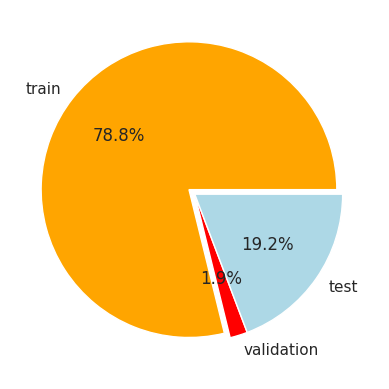

In [4]:
plt.pie([len(train), len(validation), len(test)],
        labels=['train', 'validation', 'test'], autopct='%.1f%%', colors=['orange', 'red', 'lightblue'], explode=(0.05, 0, 0))
plt.show()

In [5]:
print(train.class_names)
print(validation.class_names)
print(test.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


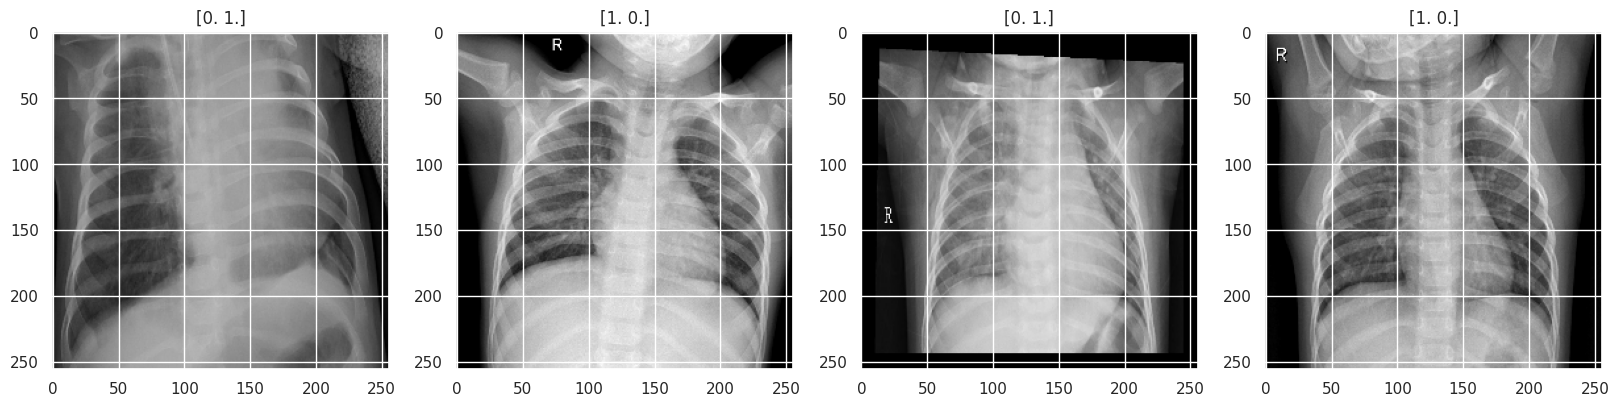

In [6]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessing Data

In [7]:
# Extracting Features and Labels
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())

for feature, label in validation:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

# Concatenate the lists to get the full 'x' and 'y' arrays
x_train = np.concatenate(x_train, axis=0)
x_val = np.concatenate(x_val, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_val = np.concatenate(y_val, axis=0)
y_test = np.concatenate(y_test, axis=0)


In [8]:
# checking the shapes of 'x_train' and 'y_train':
print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)
print("Shape of 'x_val':", x_val.shape)
print("Shape of 'y_val':", y_val.shape)
print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

Shape of 'x_train': (1300, 256, 256, 3)
Shape of 'y_train': (1300, 2)
Shape of 'x_val': (9, 256, 256, 3)
Shape of 'y_val': (9, 2)
Shape of 'x_test': (295, 256, 256, 3)
Shape of 'y_test': (295, 2)


In [9]:
# Pixel Value Scaling for Datasets: Normalizing and Standardizing the Data
x_train=x_train/256
x_val=x_val/256
x_test=x_test/256

## Training


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,909,378 (72.13 MB)

 Trainable params: 11,274,114 (43.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

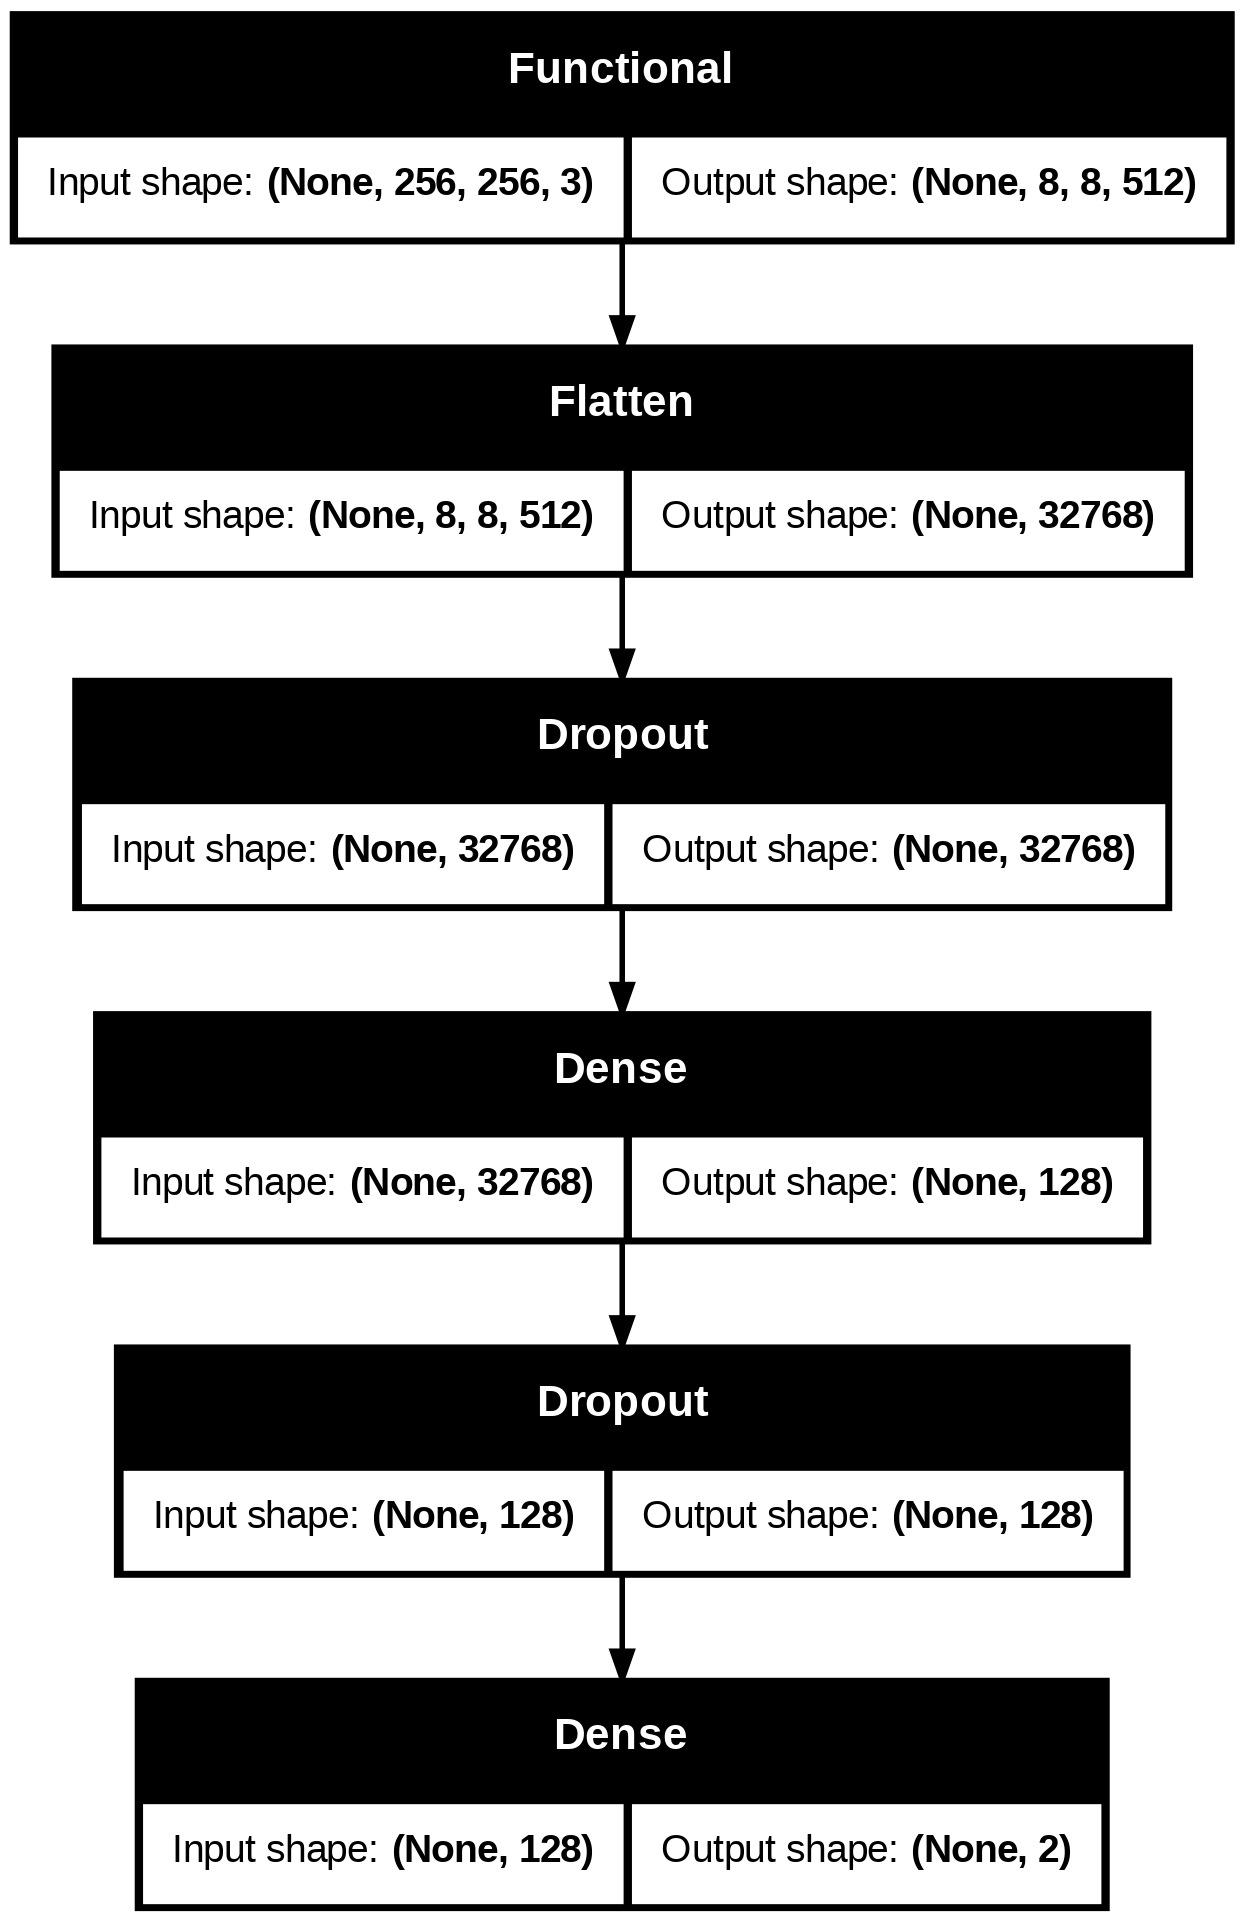

In [10]:
# We use transfer learning with VGG16 as the base model
def CNN_Model():
    base_model = VGG16(weights='imagenet', include_top = False, input_shape=(img_width, img_height, 3))
    # Freeze the base model
    for layer in base_model.layers:
        layer.trainable = False

    for i in range(3):
        base_model.layers[-2-i].trainable = True

    CNN = Sequential()
    CNN.add(Input(shape=(img_width, img_height,3)))
    CNN.add(base_model)
    CNN.add(Flatten())
    CNN.add(Dropout(0.3))
    CNN.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
    CNN.add(Dropout(0.2))
    CNN.add(Dense(2, activation='sigmoid'))

    return CNN

# Training The CNN
model = CNN_Model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# Visualized Layers of CNN
keras.utils.plot_model(model, show_shapes=True)

In [11]:
hist = model.fit(x_train, y_train, epochs= 6, validation_data= (x_val, y_val))
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")

Epoch 1/6
41/41 ━━━━━━━━━━━━━━━━━━━━ 54s 799ms/step - accuracy: 0.7738 - loss: 5.1755 - val_accuracy: 0.8889 - val_loss: 0.8198
Epoch 2/6
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 248ms/step - accuracy: 0.9461 - loss: 0.3563 - val_accuracy: 0.7778 - val_loss: 1.4508
Epoch 3/6
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 253ms/step - accuracy: 0.9641 - loss: 0.2150 - val_accuracy: 0.8889 - val_loss: 0.5022
Epoch 4/6
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.9649 - loss: 0.2683 - val_accuracy: 1.0000 - val_loss: 0.1630
Epoch 5/6
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 256ms/step - accuracy: 0.9573 - loss: 0.2615 - val_accuracy: 0.8889 - val_loss: 0.2856
Epoch 6/6
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - accuracy: 0.9677 - loss: 0.1956 - val_accuracy: 0.8889 - val_loss: 0.2488
{'accuracy': [0.8661538362503052, 0.949999988079071, 0.9592307806015015, 0.947692334651947, 0.9523077011108398, 0.9769230484962463], 'loss': [2.4724698066711426, 0.3097466230392456, 0.23291510343551636, 0.3039955496788025, 0.2621697

## Evaluating  The Model


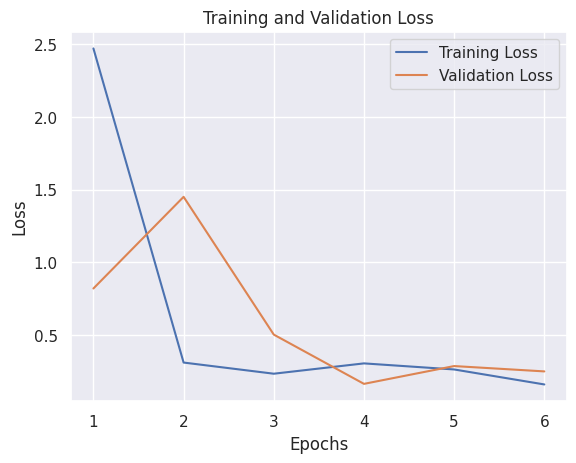

In [12]:
# Extract the training and validation loss values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

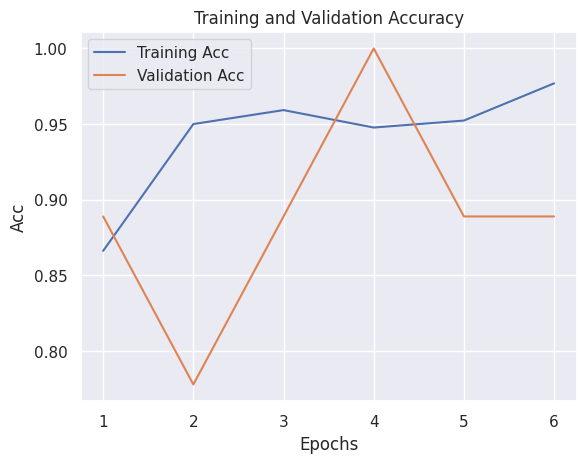

In [13]:
# Extract the training and validation loss values from the history object
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the loss graph
plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()

## <b>8 <span style='color:#2ae4f5'>|</span> Save Model  </b>

In [14]:
# Save the model
model.save('CNN_model.h5')
print ("Model saved successfully!")

Model saved successfully!


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step


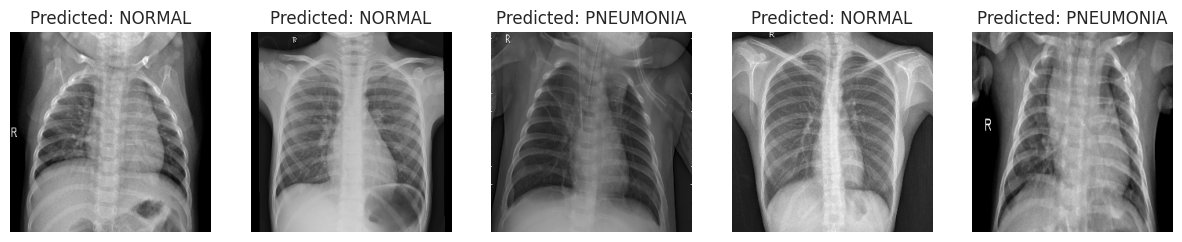

In [20]:

import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('CNN_model.h5')

# Predict on the test set
predictions = model.predict(x_test)

# Display sample predicted images
num_samples_to_display = 5
class_names = ['NORMAL', 'PNEUMONIA']  # class names

plt.figure(figsize=(15, 10))
for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(x_test[i])
    predicted_class = np.argmax(predictions[i])
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.axis('off')

plt.show()
